# Exploring the Domestic Sales of United States Avocadoes 
  
In recent years avocado has seen a rise in popularity in North America. Avocado has become a staple in many of the popular food items we see today. With the rise in popularity we've seen a sharp increase in the prices of avocado in grocery stores and additional charges for avocado in cafes and fast food restaurants. 

In this analysis we will explore the 2015-2018 domestic sales of United States avocadoes through data provided by the Hass Avocado Board and the U.S. Census Bureau. We'll analyze the price and sale focusing on:
 *  Effects of growing popularity of avocado
 *  Regional changes over time
 *  Creating a classifier to predict whether an avocado was grown organically or conventionally
 
### Summary of Results
  
After analyzing the data, we have concluded that there was a major surge in avocado prices in several metropolitan regions between 2016 and 2017. The increase in price was primarily the cities with higher demand for organically grown avocado. The high demand and low crop yield caused a surge in avocado price.
 
For more details, please refer to the the full analysis below.

In [43]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Checking for Sample Representativity

For the purpose of our analysis we want to answer a few questions about the avocado market.
We'd like to know:
 * What locations have the greatest volumes of avocadoes purchased.
 * Prices of avocadoes based on location.
 * Whether the price of avocadoes influences the amount sold.

In [44]:
data=pd.read_csv("D:/School/Kaggle/Avocado/avocado.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.7+ MB


In [45]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [46]:
#Change date to datetime
#Set collumn names to avocado variety from PLU code
data["Date"] = pd.to_datetime(data.Date)
data = data.rename(columns={"4046":"Small Hass", "4225":"Large Hass", "4770":"Extra Large Hass"})

In [47]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

The columns 4046, 4225, and 4770 are the PLU codes for different sizes of Hass avocados. We will change the column names to their type and size for readability.

The information in the data set comes from various cities, states, and general geographical regions in the United States. To avoid geographical overlapping of data we will split the data into major regions and cities. 

In [48]:
city_data = data.query('region != ["TotalUS",  "West", "Southeast","SouthCentral",  "SouthCarolina" , "Plains",  "NorthernNewEngland",   "Northeast", "Midsouth", "GreatLakes", "GrandRapids","California", "WestTexNewMexico"]') 
region_data = data.query('region == ["TotalUS",  "West", "Southeast","SouthCentral",  "SouthCarolina" , "Plains",  "NorthernNewEngland",   "Northeast", "Midsouth", "GreatLakes", "GrandRapids","California", "WestTexNewMexico"]')  

In [12]:
cities = {"Albany": 98251,
          "Atlanta": 486290,
          "BaltimoreWashington": 619493,
          "Boise": 385218,
          "Boston": 4637537,
          "BuffaloRochester": 1638259,
          "Charlotte": 1467362,
          "Chicago": 8675982,
          "CincinnatiDayton": 441672,
          "Columbus": 1528314,
          "DallasFtWorth": 6607427,
          "Denver": 2787266,
          "Detroit": 3522206,
          "HarrisburgScranton": 830602,
          "HartfordSpringfield": 1542827,
          "Houston": 5446468,
          "Indianapolis": 1564699,
          "Jacksonville": 1156291,
          "LasVegas": 2073045,
          "LosAngeles": 12815475,
          "Louisville": 1011696,
          "MiamiFtLauderdale": 6562038,
          "Nashville": 1076645,
          "NewOrleansMobile": 1029123,
          "NewYork": 19354922,
          "Orlando": 1776841,
          "Philadelphia": 5637884,
          "PhoenixTucson": 4950240,
          "Pittsburgh": 1715297,
          "Portland": 2052796,
          "RaleighGreensboro": 1353924,
          "RichmondNorfolk": 1304610,
          "Roanoke": 216177,
          "Sacramento": 1854698,
          "SanDiego": 3210314,
          "SanFrancisco": 3603761,
          "Seattle": 3643765,
          "Spokane": 403043,
          "StLouis": 2078283,
          "Syracuse": 407259,
          "Tampa": 2804240
         }

populations = []
for city in cities:
    populations.append(city)
c = []
for city in cities:
    c.append(cities[city])

popdata = pd.DataFrame({'region': populations, 'populations': c},
        columns = ['region', 'populations'])
merged_data = pd.merge(left = city_data, right = popdata, how = 'left',
        left_on = 'region', right_on = 'region')
merged_data['Volume Per Population'] = merged_data['Total Volume'] / merged_data['populations']

The figure below shows the price of avocado over time by region. The figure separates the volume of sales by the type of cultivation. Organically grown avocados are represented in turquoise conventionally grown avocados are represented in red. 

<Figure size 1584x576 with 0 Axes>

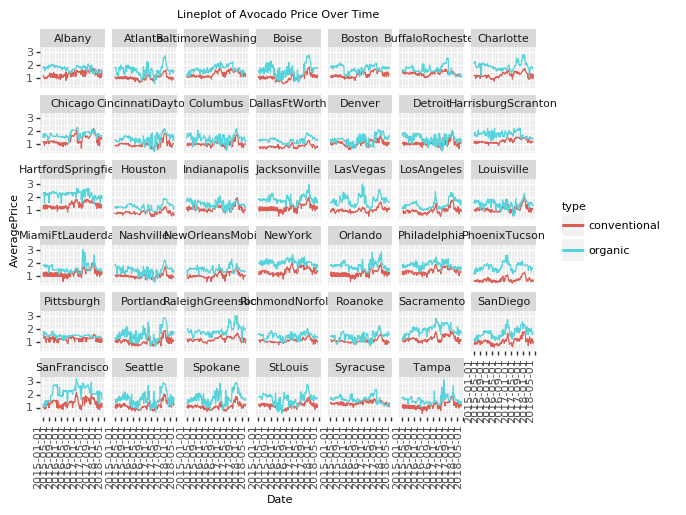

<ggplot: (-2120994128)>

In [9]:
#Visualize price between organic and conventional avocados 
plt.figure(figsize=(16,8))
(ggplot(merged_data)
        + theme(text = element_text(size=8), axis_text_x = element_text(angle = 90, hjust = 1))
        + geom_line(aes(x = "Date", y = "AveragePrice", color = "type"))
        + labs(xlab = "Volume Per Person", ylab = "Average Price",
                title = "Lineplot of Avocado Price Over Time ")
        + facet_wrap("region"))
#See large spike in price 2017 - early 2018

In most cities organic avocado is substantially more expensive than conventionally grown avocado. Organic avocado are also seen to have much more volatile prices. Large cities such as Miami, San Diego, and Seattle all saw a large spike in price in the latter end of 2017 primarily in the price of organic avocado. While cities such as Houston and Philladelphia saw little to no change in the same time frame.

To visualize the relationship between the amount of avocados sold and the price of avocado volume per person will be chosen. Since a higher volume of avocado will be sold in a higher populated area therefore would not be a good representation of demand. 


<Figure size 1152x576 with 0 Axes>

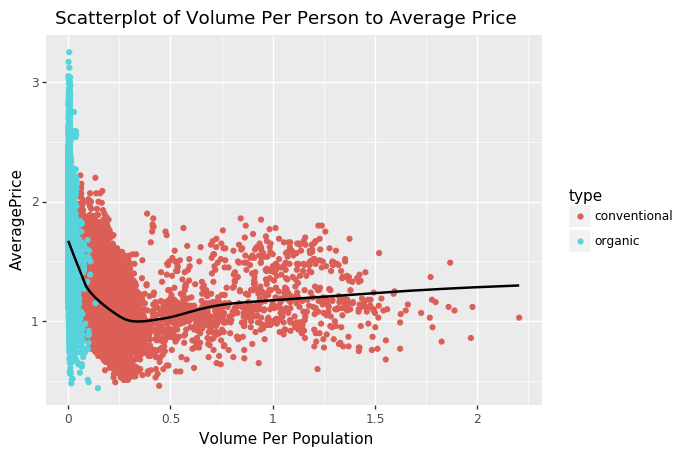

<ggplot: (27127074)>

In [26]:
plt.figure(figsize=(16,8))
(ggplot(merged_data)
        + geom_point(aes(x = "Volume Per Population", y = "AveragePrice", color = "type"))
        + geom_smooth(aes(x = "Volume Per Population", y = "AveragePrice"), method = 'lowess')
        + labs(xlab = "Volume Per Person", ylab = "Average Price",
                title = "Scatterplot of Volume Per Person to Average Price"))

There appears to be a relationship between low volume per capita of avocado to an increase in price. That partly may be due to a low supply of organic avocados with a higher price due to the difference in the cultivation process of organic avocados over conventionally grown avocados. 

The following figure shows a plot of standardized prices. Green bars depict that a price is above the average by a value of standard deviations from the mean. While red bars depict that a price is below the average by a value of standard deviations from the mean. 


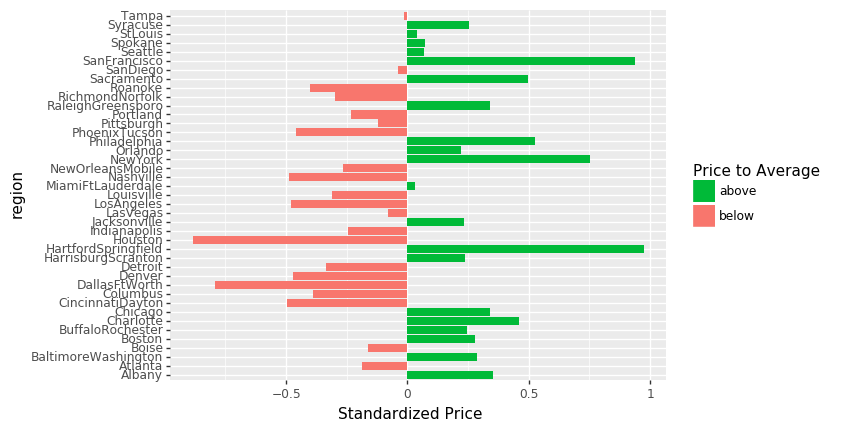

<ggplot: (-2121474875)>

In [15]:
merged_data['Mean Price'] = merged_data.groupby(['region'])['AveragePrice'].transform('mean')
merged_data['Standardized Price'] = ((merged_data['Mean Price'] -
                            merged_data['AveragePrice'].mean()) /
                            merged_data['AveragePrice'].std())
merged_data["Price Type"] = np.where(merged_data['Standardized Price'] > 0, "above", "below")
color_dict = {'Above Average': "#00ba38", 'Below Average': "#f8766d"}
(ggplot(merged_data, aes(x = 'region', y = 'Standardized Price', label = 'Standardized Price'))
        + geom_col(aes(fill = 'Price Type'), stat = 'summary', fun_y = np.mean)
        + coord_flip()
        + scale_fill_manual(name = "Price to Average", values=("#00ba38", "#f8766d")))

The large cities such as Miami, San Diego, and Seattle that saw a large spike in primarily organic avocado price in the latter end of 2017 are also cities with the highest price for avocado. While cities such as Houston that saw little to no spike have well below average prices.


### Classification

Given that the conventionally and organically grown Hass avocados are have a very different cultivation process we will try to create a classifier to predict the cultivation of a given avocado. 

To predict whether an avocado is conventionally or organically grown we will use date, region, price, and volume per capita as predictors. Predictors such as bag size volume sold and size of avocado sold were dropped due to very high correlation with volume sold. 

Scikit-learn at the time of this report does not deal with datetime objects well therefore dates are split into year, month, and date columns.

In [22]:
from sklearn import preprocessing
merged_data['Year'] = 0
merged_data['Month'] = 0
merged_data['Day'] = 0
for i in range(len(merged_data['Year'])):
        merged_data['Year'][i] = merged_data['Date'][i].year
        merged_data['Month'][i] = merged_data['Date'][i].month
        merged_data['Day'][i] = merged_data['Date'][i].day

le = preprocessing.LabelEncoder()
le1 = le.fit(merged_data['region'])
merged_data['Region Dummy'] = le1.transform(merged_data['region'])
le2 = le.fit(merged_data['type'])
merged_data['Type Dummy'] = le2.transform(merged_data['type'])

X = merged_data[['Volume Per Population','Region Dummy', 'AveragePrice', 'Year', 'Month', 'Day']]
Y = merged_data['Type Dummy']

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X, Y)
from sklearn.model_selection import cross_validate
scores = cross_validate(rf, X, Y, cv = 5)
scores

{'fit_time': array([7.21361971, 6.89434886, 7.12337542, 6.98122954, 6.86310148]),
 'score_time': array([0.30620337, 0.31622696, 0.3157258 , 0.32274127, 0.30269599]),
 'test_score': array([0.99963925, 0.98412698, 0.995671  , 0.98556478, 0.99350415])}

We get an oddly high validation score of over 99% and could be cause for concern within our model. Two potential causes for a high prediction rate are an imballance in classes and high correlation between some predictors and the response.

In [36]:
merged_data.groupby('type')['AveragePrice'].mean()

type
conventional    1.166989
organic         1.662601
Name: AveragePrice, dtype: float64

In [42]:
merged_data.groupby('type')['Total Volume'].mean()

type
conventional    488463.51102
organic          14769.56545
Name: Total Volume, dtype: float64

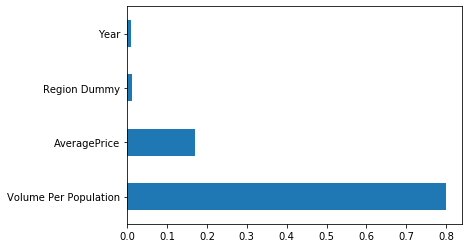

In [31]:
(pd.Series(rf.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh'))

The model saw volume per capita and price to be two predictors that had overwhelming imporatance. There is also a large disparity between the price and volume between organic and conventional avocado. This disparity is the cause for such a high prediction rate. 

### Conclusion

Avocado have seen a large increase in price 2016-2017 primarily organic avocado. California, the state in which [90% of domestic avocado are grown](https://fsi.colostate.edu/avocados/) saw a drought accompanied with the [protests of Mexican farmers](https://www.cbc.ca/news/canada/british-columbia/mexican-protests-could-signal-fluctuating-avocado-prices-this-season-1.4908341) brought a scarcity in supply.

Organic avocado account for less than 5% of the avocado sold in the United States. The affect the drought and protests on an already low supply caused surges in price. The low volume of organic avocado caused a high classification rate in our model due to volume being highly correlated with the response.